## COVID: Fairfield County Problem
## OPIM 5641 BDM Project 3
##Team 3

Vedant Dadhich

Lauren Ein
	
Junchi Ma

Jiajun Zhou

# Set up the environment

We will import the necessary libraries

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 14 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (63.2 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144927 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1

In [ ]:
# Import Pyomo Modules
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))
    
from pyomo.environ import *

#Introduction 

According to the CDC the Coronavirus disease 2019 (COVID-19) is a respiratory illness caused by a virus called SARS-CoV-2. The symptoms of the virus include many symptom similar to the common cold that can include but limited to: cough, shortness of breath, fever, chills, muscle pain, sore throat, or new loss of taste or smell. The disease is believe to spread mainly from person-to-person either people are close in contact within 6 ft or through droplets produced when an infected COVID-19 person coughs, sneezes, or talks.

As of November 24, 2020 over 59 M cases have been reported worldwide with the US leading the countries with over 12.5M cases and locally in Connecticut 0.1M cases. https://www.worldometers.info/coronavirus/ Given how contagious the disease is and the death rate it has impact the world in many meaningful ways from the economy, travel, school systems, working remotely etc. 

In this Project 3 problem there are serval pharmaceuticals working to create a COVID-19 vaccine. When the vaccine is available the distribution to the population is going to be critical. Governments at the local state and county level have begun budget planning, for this project the focus will be to minimize the logistics costs of shipping the vaccines from the hospitals to towns based on demand.

The three Connecticut hospitals that will act like distributions centers are the following:

* Yale New Haven Hospital (41.3044, 72.9356)  
* Hartford Hospital (41.7545445,  -72.6778707)
* Groton/Lawrence and Memorial Hospital (41.3363, 72.1046) 

Group 3 will focus on the minimizing the cost to 10 towns in Fairfield county. In this scenario each registered case (the demand) in every town needs to receive exactly one vaccine from the given hospitals. The logistics/shipping cost is assumed to be linearly proportional to the distance between the coordinates of the hospital and the centroid of the 10 chosen Fairfield county towns. Additionally, each hospital (New Haven, Hartford, Groton) will provide at least 30% of the vaccines for Fairfield county.

This problem is a Minimum Cost Flow Problem, Group 3 will determine how much of the COVID-19 vaccine you should transport from each hospital to each Fairfield county town such that all of the demand (registered cases) is covered and the cost is minimum. We will assume that the shipping price to transport the vaccine is directly proportional to distance (1 km = 1 dollar). Since the exact demand is not known a Monte Carlo Simulation will be used to estimate the minimum cost.


## Choosing 10 Cities in Fairfield County 

Fairfield County is the southwestern corner of Connecticut. It is most populous representing a little over 25% of the state and fastest-growing county from 2010 to 2018. As of the 2010 census, the county's population was 916,829, estimated to have increased by 3.6% to 949,921 in 2017. https://en.wikipedia.org/wiki/Fairfield_County,_Connecticut It is considered part of the metro New York economy and home to four of Connecticut's most dynamic and diverse metropolitan areas (Stamford, Norwalk, Bridgeport and Danbury). Home to 19 of Fortune 1000 corporation and  companies specializing in advanced manufacturing, financial services, professional services and healthcare. Boasting that the region’s diverse, skilled and mobile workforce is just one of the many reasons that the Fairfield region is considered by many to be a ‘global neighborhood. https://portal.ct.gov/ChooseCt/Regions/Fairfield 

Given the high population, large city centers, and proximity to New York City Group 3 noted that there are many potential risk for a high demand of vaccines needed for Fairfield County. There were a few factors that we considered proximity to hospitals, number of cases, land area, cities along the coast/I95, affluent cities, etc. Ultimately the metric the group used to determine the 10 focus cities was population. Provided that the county represents more than a quarter of the state and how COVID is understood to spread person-to-person having a high population puts a town potentially more at risk. Population data: https://statisticalatlas.com/county/Connecticut/Fairfield-County/Population 



## 10 Cities Descriptions

1.	$Bridgeport-$ Population 147.02k “The Park City” is a historic seaport city in Connecticut, and its largest city, as well the fifth-most populous in New England. It is 60 miles from Manhattan. Showman P. T. Barnum was a resident of the city and served as the town's mayor in the late 19th century. The first Subway restaurant opened in Bridgeport's North End in 1965.The Frisbie Pie Company was founded in Bridgeport, and the city is credited as the birthplace of the Frisbee. After World War II, industrial restructuring and suburbanization caused the loss of many jobs and affluent residents, leaving Bridgeport struggling with poverty and violent crime. Since the beginning of the 21st century, Bridgeport has begun redevelopment of its downtown and other neighborhoods.

2.	$Stamford$- Population 127.41k “Lock City” Approximately halfway between Manhattan and New Haven at approximately 38 miles from each. Stamford is home to 9 Fortune 500 companies as of 2019. This gives Stamford the largest financial district in the New York metropolitan region outside New York City itself and one of the largest concentrations of corporations in the United States. Dominant sectors of its economy include financial services, tourism, information technology, healthcare, telecommunications, transportation, and retail. Stamford was known as Rippowam by the Siwanoy Native American inhabitants to the region. The present name is after the town of Stamford, Lincolnshire, England.

3.	$Norwalk$- Population 87.93k “Oyster Town” In the northern shore of Long Island Sound. Norwalk lies within both the New York metropolitan area, as well as the Bridgeport metropolitan area. Norwalk was settled in 1649, and is the sixth most populous city in Connecticut. Roger Ludlow purchased the areas east of the Norwalk river from Chief Mahackemo of the Norwaake (or Naramauke) Indians in 1640. Norwalk was settled in 1649, incorporated September 1651, and named after the Algonquin word noyank, meaning "point of land", or more probably from the native American name "Naramauke"

4.	$Danbury$- Population 83.89k “Hat City” located approximately 50 miles (80 km) northeast of New York City, making it part of the New York metropolitan area. Danbury is nicknamed the "Hat City" because it was the center of the American hat industry for a period in the nineteenth and early twentieth centuries. The mineral danburite is named for Danbury while the city itself is named for Danbury in Essex, England. In November 2015, USA Today ranked Danbury as the second best city to live in the United States.

5.	$Greenwich$- Population 62.42k “Hedge Fund Capital” The largest town on Connecticut's Gold Coast, Greenwich is home to many hedge funds and other financial service firms. Greenwich is a principal community of the Bridgeport–Stamford–Norwalk–Danbury metropolitan statistical area, which comprises all of Fairfield County. Greenwich is the southernmost and westernmost municipality in Connecticut as well as in the six-state region of New England. The town is named after Greenwich, a royal borough of London in the United Kingdom.

6.	$Fairfield$- Population 61.11k Fairfield, Connecticut, is a charming and thriving town featuring five miles of shoreline on the Long Island Sound. Fairfield has five town beaches, two universities, many parks and ball fields, two public golf courses, and a vibrant array of restaurants and stores.

7.	$Stratford$- Population 52.30k Founded in 1639, Stratford is a community rich in history and abundant natural beauty. Situated on Long Island Sound, and bounded to the east by the Housatonic River, Stratford has long viewed its waterfront as an important natural resource. Within an hour's drive of New York City, Stratford is the easternmost town in Fairfield County-Connecticut's Gold Coast

8.	$Shelton$- Population 40.98k Shelton was settled by the English as part of the town of Stratford, Connecticut, in 1639. Shelton was split off from Stratford in 1789, as Huntington (named for Samuel Huntington). The current name originated in a manufacturing village started in the 1860s named for the Shelton Company founded by Edward N. Shelton—also founder of Ousatonic Water Power Company.

9.	$Trumbull$- Population 36.48k Trumbull was the home of the Golden Hill Paugussett Indian Nation for thousands of years before the English settlement was made in 1639. The town was named after Jonathan Trumbull (1710–1785), a merchant, patriot, and statesman when it was incorporated in 1797. Aviation pioneer Igor Sikorsky lived in Trumbull during his active years when he designed, built, and flew fixed-wing aircraft and put the helicopter into mass production for the first time.

10.	$Newtown$- Population 27.99k  It is part of the greater Danbury metropolitan area as well as the New York metropolitan area. Newtown was founded in 1705, and later incorporated in 1711.  The western half of Newtown (ZIP Code 06470) is one of the most affluent areas in Connecticut. Local industry has included the manufacture of furniture, tea bags, combs, fire hoses, folding boxes, buttons, and hats, as well as farming, and mica and feldspar mining. The game of "Scrabble" was developed here by James Brunot.


(live otipn: https://data.ct.gov/stories/s/COVID-19-Daily-Report/q5as-kyim/)

Area circled by blue line is fairfield county
![picture](https://drive.google.com/uc?export=view&id=1VZlvPX5s6BGz9wSKuythYDwrZi1atXxt)




# Section 1: Data Prep and EDA

## Mapping of 3 CT Hospitals and 10 Cities 

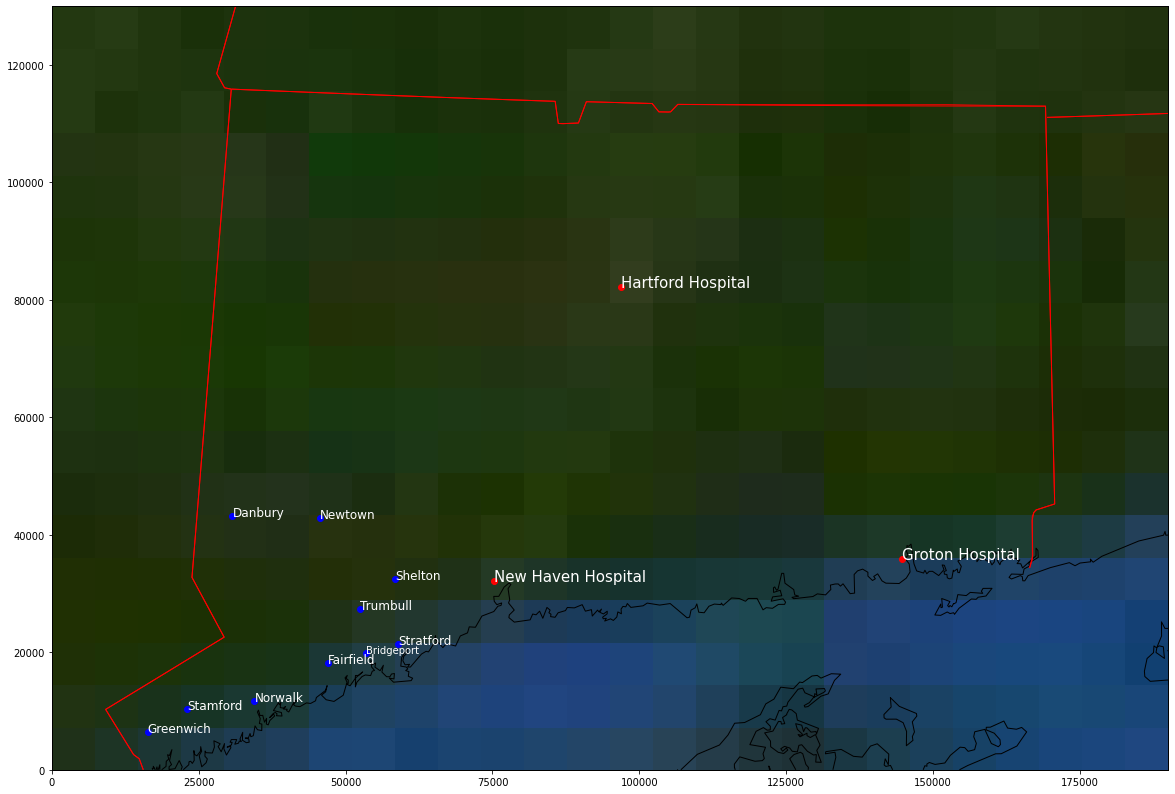

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# the lattituide and longituide values are along the y and x axis of the map of Connecticut
# Chose the resolution = 'h' to show the coastline not the crude resolution c.
fig = plt.figure(figsize=(20,16))
m = Basemap( projection='lcc', resolution='h', 
            lat_0=41.6, lon_0=-72.7,
            width=190000, height=130000, suppress_ticks=False)

#Plotting the three major hospitals with red dots
#Yale New Haven Hospital (41.3044, -72.9356), Hartford Hospital (41.7545445,  -72.6778707), Groton/Lawrence and Memorial Hospital (41.3363, -72.1046)

latitudes_y = [41.3044, 41.7545445, 41.3363]
longitude_x = [-72.9356, -72.6778707, -72.1046]
x,y = m(longitude_x, latitudes_y)
m.plot(x,y,'ro')
plt.text(x[0],y[0], 'New Haven Hospital', fontsize=15,  color='white')
plt.text(x[1],y[1], 'Hartford Hospital', fontsize=15,  color='white')
plt.text(x[2],y[2], 'Groton Hospital', fontsize=15,  color='white')

#10 chosen sities in Fairfield county CT in blue dots
lat_y_county = [41.4014, 41.0691, 41.1050, 41.2079, 41.1181, 41.1778, 41.1926, 41.2602, 41.3061, 41.3988]
lon_x_county = [-73.4705, -73.6385, -73.5590, -73.1304, -73.4226, -73.2733, -73.1960, -73.2084, -73.1382, -73.2928]
xCounty,yCounty =  m(lon_x_county, lat_y_county)
m.plot(xCounty,yCounty,'bo')
plt.text(xCounty[0],yCounty[0], 'Danbury', fontsize=12,  color='white')
plt.text(xCounty[1],yCounty[1], 'Greenwich', fontsize=12,  color='white')
plt.text(xCounty[2],yCounty[2], 'Stamford', fontsize=12,  color='white')
plt.text(xCounty[3],yCounty[3], 'Stratford', fontsize=12,  color='white')
plt.text(xCounty[4],yCounty[4], 'Norwalk', fontsize=12,  color='white')
plt.text(xCounty[5],yCounty[5], 'Fairfield', fontsize=12,  color='white')
plt.text(xCounty[6],yCounty[6], 'Bridgeport', fontsize=10,  color='white')
plt.text(xCounty[7],yCounty[7], 'Trumbull', fontsize=12,  color='white')
plt.text(xCounty[8],yCounty[8], 'Shelton', fontsize=12,  color='white')
plt.text(xCounty[9],yCounty[9], 'Newtown', fontsize=12,  color='white')


m.drawcoastlines()
m.drawcountries(linewidth=2.0, linestyle='solid',color='blue')
m.drawstates(linewidth=1.0, linestyle='solid',color='red')
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.bluemarble()


#m.readshapefile('/content/drive/My Drive/Colab Notebooks/Data/st99_d00', name='states', drawbounds=True)
#m.states_info
m.drawmapboundary(fill_color='aqua')
#plt.title("Miller Cylindrical Projection")
plt.show()

## Calculate the distance between each city and each hospital

We use haversine distance function to create the matrix of distancesand this will be used as input for the Minimum Cost Flow model that we will need to create. 


In [ ]:
from sklearn.metrics.pairwise import haversine_distances
import pandas as pd
import numpy as np
from math import radians



lat1 = [41.3044,41.7545445,41.3363]
long1 = [72.9356,-72.6778707,72.1046]

def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)

   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)


cities = pd.DataFrame(data={
   'City': ['Danbury', 'Greenwich', 'Stamford', 'Stratford', 'Norwalk','Fairfield', 'Bridgeport', 'Trumbull', 'Shelton', 'Newtown'],
   'Lat' : [41.4014, 41.0691, 41.1050, 41.2079, 41.1181, 41.1778, 41.1926, 41.2602, 41.3061, 41.3988],
   'Lon' : [-73.4705, -73.6385, -73.5590, -73.1304, -73.4226, -73.2733, -73.1960, -73.2084, -73.1382, -73.2928 ]
})

distances_km_YNHH = []
distances_km_HH = []
distances_km_GLMH = []
for row in cities.itertuples(index=False):
    distances_km_YNHH.append(
       haversine_distance(lat1[0], abs(long1[0]), row.Lat, abs(row.Lon)))
    distances_km_HH.append(
       haversine_distance(lat1[1], abs(long1[1]), row.Lat, abs(row.Lon)))
    distances_km_GLMH.append(
       haversine_distance(lat1[2], abs(long1[2]), row.Lat, abs(row.Lon)))

   

cities['DistanceFromYaleNewHaven'] = distances_km_YNHH
cities['DistanceFromHH'] = distances_km_HH
cities['DistanceFromGLMH'] = distances_km_GLMH

cities


,City,Lat,Lon,DistanceFromYaleNewHaven,DistanceFromHH,DistanceFromGLMH
0,Danbury,41.4014,-73.4705,45.93,76.74,114.21
1,Greenwich,41.0691,-73.6385,64.38,110.57,131.72
2,Stamford,41.1050,-73.5590,56.67,103.02,124.33
3,Stratford,41.2079,-73.1304,19.50,71.52,86.91
4,Norwalk,41.1181,-73.4226,45.70,94.14,112.86
5,Fairfield,41.1778,-73.2733,31.55,81.08,99.27
6,Bridgeport,41.1926,-73.1960,25.07,75.95,92.61
7,Trumbull,41.2602,-73.2084,23.32,70.52,92.60
8,Shelton,41.3061,-73.1382,16.92,62.89,86.38
9,Newtown,41.3988,-73.2928,31.61,64.66,99.40


## Plot the network flow diagram for 3 CT hospitals and 10 cities

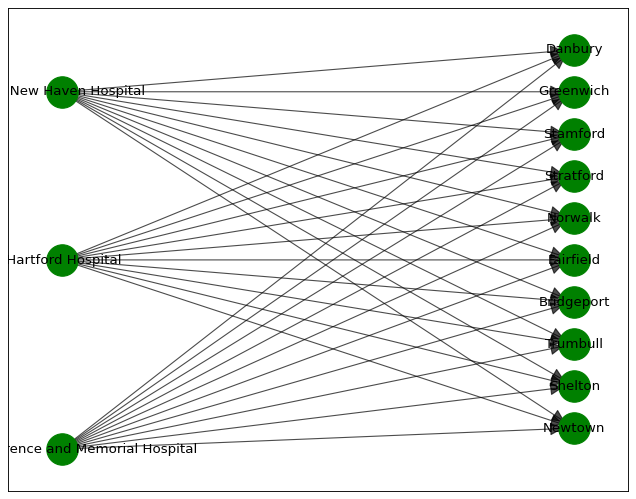

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

G = nx.DiGraph()
G.add_edges_from(
    [('Y', 'D'), ('Y', 'G'), ('Y', 'ST'),('Y', 'STR'), ('Y', 'N'), ('Y', 'F'),
     ('Y', 'B'),('Y', 'T'),('Y', 'S'), ('Y', 'NE'), ('H', 'D'),('H', 'G'),
     ('H', 'ST'), ('H', 'STR'), ('H', 'N'),('H', 'F'), ('H', 'B'), ('H', 'T'),
     ('H', 'S'), ('H', 'NE'), ('GL', 'D'),('GL', 'G'), ('GL', 'ST'), ('GL', 'STR'),
     ('GL', 'N'), ('GL', 'F'), ('GL', 'B'),('GL', 'T'), ('GL', 'S'), ('GL', 'NE'),
     ])

labels = {'D':'Danbury', 'G':'Greenwich', 'ST':'Stamford', 'STR':'Stratford', 'N':'Norwalk', 'F':'Fairfield', 'B':'Bridgeport', 
          'T':'Trumbull', 'S':'Shelton', 'NE':'Newtown', 'Y':'Yale New Haven Hospital','H':' Hartford Hospital','GL':'Groton/Lawrence and Memorial Hospital'}


fixed_positions = {'Y':(4, 18),'H':(4, 10),'GL':(4, 1) ,'D':(5, 20),'G':(5, 18),'ST':(5, 16),'STR':(5, 14), 'N':(5, 12), 'F':(5, 10), 'B':(5, 8), 'T':(5, 6), 'S':(5, 4), 'NE':(5, 2)} 
fixed_nodes = fixed_positions.keys() 

pos = nx.spring_layout(G, k=2, pos=fixed_positions  ,fixed=fixed_nodes, iterations=100, threshold=0.0001, weight='weight', scale=10, center= [0,1000], dim=2)
nx.draw_networkx_labels(G, pos, labels=labels)
nx.draw_networkx_nodes(G, pos=fixed_positions,  node_size = 800, node_color= '#008000', )
nx.draw_networkx_edges(G, pos, arrows=True, arrowsize= 25, alpha=0.7, min_target_margin=10)

plt.show()

# Section 2: Modeling


## The baseline/deterministic network model

In the first part, we will build a Minimum Cost Flow model in order to compute the shipping costs when the demand is fixed. From the network flow diagram, we know there are 30 possible vaccines shipment routes, and for each route, the shipping price to transport the vaccine is directly proportional to distance (1 km = 1 dollar). The following table provides the given information for this model:

In [ ]:
df = cities[['City','DistanceFromYaleNewHaven','DistanceFromHH','DistanceFromGLMH']] 
df = df.set_index('City') 
df = df.rename(columns={"DistanceFromYaleNewHaven": "YaleNewHaven", "DistanceFromHH": "Hartford", "DistanceFromGLMH": "GrotonLawrence"})
df.T

City,Danbury,Greenwich,Stamford,Stratford,Norwalk,Fairfield,Bridgeport,Trumbull,Shelton,Newtown
YaleNewHaven,45.93,64.38,56.67,19.50,45.70,31.55,25.07,23.32,16.92,31.61
Hartford,76.74,110.57,103.02,71.52,94.14,81.08,75.95,70.52,62.89,64.66
GrotonLawrence,114.21,131.72,124.33,86.91,112.86,99.27,92.61,92.60,86.38,99.40


### Break down the problem

1. Decision variables shown in the above network diagram and the table

2. Demand constraints:

Since each town must receive exactly one vaccine from the hospitals for each registered case, we will use the number of cases for the Day 0 (found in ["COVID-19 Update October 28, 2020"](https://drive.google.com/file/d/1W-6AbJ7d9ifxE_BpRiRCS8TiwqkShGvG/view?usp=sharing ) ) to present the demand of vaccines. Thus, the demand for the each component of the manufacturer must satisfy: 

Danbury : $YaleDanbury + HartfordDnabury +GrotonDanbury= 3239$ 

Greenwich : $YaleGreenwich + HartfordGreenwich +GrotonGreenwich= 1061$ 

The other eight city has the same constrainsts for its demand.

3. Supply constraint 

3.1 Assume that each hospital will provide at least 30% of the vaccines for your county, i.e., at least 30% of the vaccines will come from Yale, at least 30% will come from Hartford, and at least 30% will come from Groton.

YaleNewHaven:  $\Sigma_{j=1}^{10} (YaleNewHavenCity_j) \geq 0.3*(\Sigma_{j=1}^{10} (YaleNewHavenCity_j)+ \Sigma_{j=1}^{10} (HartfordCity_j) + \Sigma_{j=1}^{10} (GrotonCity_j))$ 


3.2 Assume supply is infinite (each hospital has 10M vaccines available).

YaleNewHaven:  $\Sigma_{j=1}^{10} (YaleNewHavenCity_j) \leq 10000000$ 

Other hospital have the same constrainsts for its supply.


4. Objective Function 

the minimum total the cost of shipping vaccines from hospitals to towns:

$\min(z) = \Sigma_{i=1}^{10}\Sigma_{j=1}^{3} (Unit cost (City_iHospital_j) * Supply Number of (City_iHospital_j))$



### Set the dictionary for supply, demand and unit shipping cost,

In [ ]:
# Set the dictionary for the demand of each city and supply of each hospital.
Supply = {
   'YaleNewHaven':    10000000,        # Yale New Haven Hospital 
   'Hartford':      10000000,         # Hartford Hospital
   'GrotonLawrence':  10000000      # Groton/Lawrence and Memorial Hospital 
}

Demand = {
    'Danbury': 3239, 
    'Greenwich': 1061, 
    'Stamford': 4045, 
    'Stratford': 1040, 
    'Norwalk': 2783,
    'Fairfield': 1054, 
    'Bridgeport': 4695, 
    'Trumbull': 631, 
    'Shelton':780, 
    'Newtown':313 
}

# Set the dictionary for the unit shipping cost with key of DEMAND - SUPPLY pairs 
T=df.stack().to_dict()
T

{('Bridgeport', 'GrotonLawrence'): 92.61,
 ('Bridgeport', 'Hartford'): 75.95,
 ('Bridgeport', 'YaleNewHaven'): 25.07,
 ('Danbury', 'GrotonLawrence'): 114.21,
 ('Danbury', 'Hartford'): 76.74,
 ('Danbury', 'YaleNewHaven'): 45.93,
 ('Fairfield', 'GrotonLawrence'): 99.27,
 ('Fairfield', 'Hartford'): 81.08,
 ('Fairfield', 'YaleNewHaven'): 31.55,
 ('Greenwich', 'GrotonLawrence'): 131.72,
 ('Greenwich', 'Hartford'): 110.57,
 ('Greenwich', 'YaleNewHaven'): 64.38,
 ('Newtown', 'GrotonLawrence'): 99.4,
 ('Newtown', 'Hartford'): 64.66,
 ('Newtown', 'YaleNewHaven'): 31.61,
 ('Norwalk', 'GrotonLawrence'): 112.86,
 ('Norwalk', 'Hartford'): 94.14,
 ('Norwalk', 'YaleNewHaven'): 45.7,
 ('Shelton', 'GrotonLawrence'): 86.38,
 ('Shelton', 'Hartford'): 62.89,
 ('Shelton', 'YaleNewHaven'): 16.92,
 ('Stamford', 'GrotonLawrence'): 124.33,
 ('Stamford', 'Hartford'): 103.02,
 ('Stamford', 'YaleNewHaven'): 56.67,
 ('Stratford', 'GrotonLawrence'): 86.91,
 ('Stratford', 'Hartford'): 71.52,
 ('Stratford', 'YaleNewH

### Build the model in Pyomo

In [ ]:
# define the model
# Step 0: Create an instance of the model
model = ConcreteModel()

# Step 1: Define index sets - dictionary syntax {key : value}
CUS = list(Demand.keys())  # demand for cities
SRC = list(Supply.keys()) # source of the hospitals

# Step 2: Define the decision variable 
model.x = Var(CUS, SRC, domain = NonNegativeIntegers)

# Step 3: Define Objective
model.Cost = Objective(
    expr = sum([T[c,s]*model.x[c,s] for c in CUS for s in SRC]),
    sense = minimize)

# Step 4: Add Constraints (mentioned above)
model.src = ConstraintList()
for s in SRC:
    model.src.add(sum([model.x[c,s] for c in CUS]) >= 0.3 * sum([model.x[c,s] for c in CUS for s in SRC]))

model.src2 = ConstraintList()
for s in SRC:
    model.src2.add(sum([model.x[c,s] for c in CUS]) <= Supply[s])
        
model.dmd = ConstraintList()
for c in CUS:
    model.dmd.add(sum([model.x[c,s] for s in SRC]) == Demand[c])

In [ ]:
# solve the model and show results
results = SolverFactory('cbc').solve(model)
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 1397486.97
  Upper bound: 1397486.97
  Number of objectives: 1
  Number of constraints: 16
  Number of variables: 30
  Number of binary variables: 0
  Number of integer variables: 30
  Number of nonzeros: 30
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.01
  Wallclock time: 0.01
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch 

### Present the results

1. Print the total shipping cost

In [ ]:
# print the cost 
print("The baseline model shipping cost is", model.Cost())

The baseline model shipping cost is 1397486.97


2. Print the detail supply number

In [ ]:
# Print the supply number for 30 combinations of each city and each hospital
solution = pd.DataFrame([[c, s, model.x[c,s](),T[c,s]*model.x[c,s]()] for c in CUS for s in SRC])
cols = {'columns': {0: 'City', 1: 'Hospital', 2: 'Value'}}
solution = solution.rename(**cols)
solution = solution.pivot(index='City', columns='Hospital', values='Value')
solution.T

City,Bridgeport,Danbury,Fairfield,Greenwich,Newtown,Norwalk,Shelton,Stamford,Stratford,Trumbull
Hospital,,,,,,,,,,
GrotonLawrence,1009.0,0.0,0.0,1061.0,0.0,2783.0,0.0,0.0,1040.0,0.0
Hartford,0.0,3239.0,0.0,0.0,313.0,0.0,780.0,1561.0,0.0,0.0
YaleNewHaven,3686.0,0.0,1054.0,0.0,0.0,0.0,0.0,2484.0,0.0,631.0


3. Print the total supply number and shipping cost for each hospital

In [ ]:
for s in SRC:
      print('The total supply for', s, 'is', sum([model.x[c,s]() for c in CUS ]))
      print('The shipping cost for', s, 'is', sum([T[c,s]*model.x[c,s]() for c in CUS ]))

The total supply for YaleNewHaven is 7855.0
The shipping cost for YaleNewHaven is 281144.92000000004
The total supply for Hartford is 5893.0
The shipping cost for Hartford is 478667.86
The total supply for GrotonLawrence is 5893.0
The shipping cost for GrotonLawrence is 637674.19


## Monte Carlo Simulation and Network Model (Pt. 1)

### Simulate the demand distribution

Assume the demand/cases at each town centroid follows a triangle distribution - which is parametrized by min, max, and mode) 


In [ ]:
# Import the Day0 case
demand = pd.DataFrame(data={
   'City': ['Danbury', 'Greenwich', 'Stamford', 'Stratford', 'Norwalk','Fairfield', 'Bridgeport', 'Trumbull', 'Shelton', 'Newtown'],
   'Day0case' : [3239,1061,4045,1040,2783,1054,4695,631,780,313]
})

# The min will be COVID today
demand['min']=demand['Day0case']

# The max will be 5x current numbers
demand['max']=5*demand['Day0case']

# The mode will be 2x current numbers
demand['mode']=2*demand['Day0case']

# Display the demand of 10 cities
demand

,City,Day0case,min,max,mode
0,Danbury,3239,3239,16195,6478
1,Greenwich,1061,1061,5305,2122
2,Stamford,4045,4045,20225,8090
3,Stratford,1040,1040,5200,2080
4,Norwalk,2783,2783,13915,5566
5,Fairfield,1054,1054,5270,2108
6,Bridgeport,4695,4695,23475,9390
7,Trumbull,631,631,3155,1262
8,Shelton,780,780,3900,1560
9,Newtown,313,313,1565,626


### Run the Minimum Cost Flow model in 10,000 different scenarios

We create a Monte Carlo Simulation for the demand of each city to run the network models 10,000 different times.

In [ ]:
totalcost = ()
hartfordcost = ()
newheavencost = ()
grotoncost = ()
totalsupply = ()
hartfordsupply = ()
newheavensupply = ()
grotonsupply = ()
for r in range(10000):
  # Generate the random demand of each city with size =1 and set the dictionary
  City = demand['City']
  Demand = {c:int(np.random.triangular(demand[demand['City']==c]['min'], 
                     demand[demand['City']==c]['mode'], 
                     demand[demand['City']==c]['max'], 1)) for c in City}   
  # define the model
  # Step 0: Create an instance of the model
  model = ConcreteModel()

  # Step 1: Define index sets - dictionary syntax {key : value}
  CUS = list(Demand.keys())  # demand for cities
  SRC = list(Supply.keys()) # source of the hospitals

  # Step 2: Define the decision variable 
  model.x = Var(CUS, SRC, domain = NonNegativeIntegers)

  # Step 3: Define Objective
  model.Cost = Objective(
      expr = sum([T[c,s]*model.x[c,s] for c in CUS for s in SRC]),
      sense = minimize)

  # Step 4: Add Constraints (note the ease in which this happens with for loops!)

  model.src = ConstraintList()
  for s in SRC:
      model.src.add(sum([model.x[c,s] for c in CUS]) >= 0.3 * sum([model.x[c,s] for c in CUS for s in SRC]))

  model.src2 = ConstraintList()
  for s in SRC:
      model.src2.add(sum([model.x[c,s] for c in CUS]) <= Supply[s])
          
  model.dmd = ConstraintList()
  for c in CUS:
      model.dmd.add(sum([model.x[c,s] for s in SRC]) == Demand[c])

  # solve the model and show results
  results = SolverFactory('cbc').solve(model)
  totalcost = np.append(totalcost, model.Cost())
  hartfordcost = np.append(hartfordcost, sum([T[c,'Hartford']*model.x[c,'Hartford']() for c in CUS ]) )
  newheavencost = np.append(newheavencost,sum([T[c,'YaleNewHaven']*model.x[c,'YaleNewHaven']() for c in CUS ]))
  grotoncost = np.append(grotoncost,sum([T[c,'GrotonLawrence']*model.x[c,'GrotonLawrence']() for c in CUS ]))
  totalsupply = np.append(totalsupply,sum([model.x[c,s]() for c in CUS for s in SRC]))
  hartfordsupply = np.append(hartfordsupply,sum([model.x[c,'Hartford']() for c in CUS ])   )
  newheavensupply = np.append(newheavensupply,sum([model.x[c,'YaleNewHaven']() for c in CUS ]))
  grotonsupply = np.append(grotonsupply,sum([model.x[c,'GrotonLawrence']() for c in CUS ]))  

In [ ]:
import numpy as np
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting
from pylab import * # for plotting

# Compare the supply number of each hospotal
supply1 = pd.DataFrame([newheavensupply,hartfordsupply,grotonsupply])
cols = {'columns': {0: 'newheaven', 1: 'hartford', 2: 'groton/lawrence'}}
supply1 = supply1.T.rename(**cols)
supply1.describe().round(3)

,newheaven,hartford,groton/lawrence
count,10000.000,10000.000,10000.000
mean,20947.539,15711.773,15711.773
std,2672.658,2004.496,2004.496
min,12604.000,9453.000,9453.000
25%,19060.750,14297.000,14297.000
50%,20828.500,15622.500,15622.500
75%,22754.500,17066.500,17066.500
max,31285.000,23464.000,23464.000


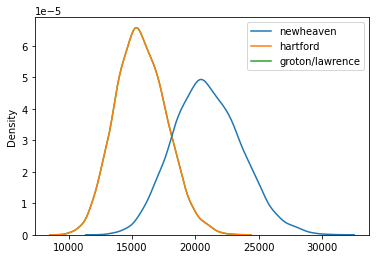

In [ ]:
# Plot
sns.kdeplot(data=supply1)

In [ ]:
# Compare the shipping cost of each hospotal
cost1 = pd.DataFrame([newheavencost,hartfordcost,grotoncost])
cols = {'columns': {0: 'newheaven', 1: 'hartford', 2: 'groton/lawrence'}}
cost1 = cost1.T.rename(**cols)
cost1.describe().round(3)

,newheaven,hartford,groton/lawrence
count,10000.000,10000.000,10000.000
mean,752882.328,1280394.476,1692791.709
std,139831.366,183318.609,216068.090
min,380129.160,744253.800,1005509.740
25%,647884.350,1149032.962,1543648.915
50%,740712.335,1270535.080,1683846.260
75%,846807.385,1402439.772,1834774.197
max,1255899.880,1938086.340,2565281.960


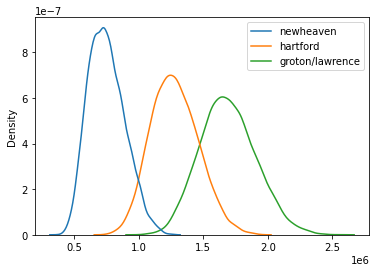

In [ ]:
# Plot
sns.kdeplot(data=cost1)

In [ ]:
# Present the total shipping cost with five number summaries
pd.DataFrame(totalcost).describe().round(3)

,0
count,10000.000
mean,3726068.514
std,489820.562
min,2181876.810
25%,3383280.957
50%,3700831.620
75%,4053684.725
max,5570052.070


In [ ]:
# Present the total supply with five number summaries
pd.DataFrame(totalsupply).describe().round(3)

,0
count,10000.000
mean,52371.086
std,6681.649
min,31510.000
25%,47654.750
50%,52073.500
75%,56887.500
max,78213.000


## Monte Carlo Simulation and Network Model (Pt. 2)

1. Demand constraints: the simulation of demand does't change 
2. Supply constraints: change the model such that each hospital must cover at least 10% of the demand for vaccines for your county. 

In [ ]:
totalcost2 = ()
hartfordcost2 = ()
newheavencost2 = ()
grotoncost2 = ()
totalsupply2 = ()
hartfordsupply2 = ()
newheavensupply2 = ()
grotonsupply2 = ()
for r in range(10000):
  # Generate the random demand of each city with size =1 and set the dictionary
  City = demand['City']
  Demand = {c:int(np.random.triangular(demand[demand['City']==c]['min'], 
                     demand[demand['City']==c]['mode'], 
                     demand[demand['City']==c]['max'], 1)) for c in City}   
  # define the model
  # Step 0: Create an instance of the model
  model = ConcreteModel()

  # Step 1: Define index sets - dictionary syntax {key : value}
  CUS = list(Demand.keys())  # demand for cities
  SRC = list(Supply.keys()) # source of the hospitals

  # Step 2: Define the decision variable 
  model.x = Var(CUS, SRC, domain = NonNegativeIntegers)

  # Step 3: Define Objective
  model.Cost = Objective(
      expr = sum([T[c,s]*model.x[c,s] for c in CUS for s in SRC]),
      sense = minimize)

  # Step 4: Add Constraints (note the ease in which this happens with for loops!)

  model.src = ConstraintList()
  for s in SRC:
      model.src.add(sum([model.x[c,s] for c in CUS]) >= 0.1 * sum([model.x[c,s] for c in CUS for s in SRC]))

  model.src2 = ConstraintList()
  for s in SRC:
      model.src2.add(sum([model.x[c,s] for c in CUS]) <= Supply[s])
          
  model.dmd = ConstraintList()
  for c in CUS:
      model.dmd.add(sum([model.x[c,s] for s in SRC]) == Demand[c])

  # solve the model and show results
  results = SolverFactory('cbc').solve(model)
  totalcost2 = np.append(totalcost2, model.Cost())
  hartfordcost2 = np.append(hartfordcost2, sum([T[c,'Hartford']*model.x[c,'Hartford']() for c in CUS ]) )
  newheavencost2 = np.append(newheavencost2,sum([T[c,'YaleNewHaven']*model.x[c,'YaleNewHaven']() for c in CUS ]))
  grotoncost2 = np.append(grotoncost2,sum([T[c,'GrotonLawrence']*model.x[c,'GrotonLawrence']() for c in CUS ]))
  totalsupply2 = np.append(totalsupply2,sum([model.x[c,s]() for c in CUS for s in SRC]))
  hartfordsupply2 = np.append(hartfordsupply2,sum([model.x[c,'Hartford']() for c in CUS ])   )
  newheavensupply2 = np.append(newheavensupply2,sum([model.x[c,'YaleNewHaven']() for c in CUS ]))
  grotonsupply2 = np.append(grotonsupply2,sum([model.x[c,'GrotonLawrence']() for c in CUS ]))  

In [ ]:
# Compare the supply number of each hospotal
supply2 = pd.DataFrame([newheavensupply2,hartfordsupply2,grotonsupply2])
cols = {'columns': {0: 'newheaven', 1: 'hartford', 2: 'groton/lawrence'}}
supply2 = supply2.T.rename(**cols)
supply2.describe().round(3)

,newheaven,hartford,groton/lawrence
count,10000.000,10000.000,10000.000
mean,41871.775,5234.533,5234.533
std,5290.484,661.308,661.308
min,26199.000,3276.000,3276.000
25%,38030.500,4754.000,4754.000
50%,41706.000,5214.000,5214.000
75%,45357.250,5670.000,5670.000
max,63831.000,7980.000,7980.000


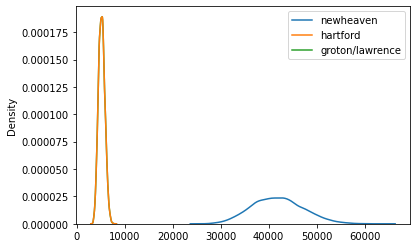

In [ ]:
# Plot
sns.kdeplot(data=supply2)

In [ ]:
# Compare the shipping cost of each hospotal
cost2 = pd.DataFrame([newheavencost2,hartfordcost2,grotoncost2])
cols = {'columns': {0: 'newheaven', 1: 'hartford', 2: 'groton/lawrence'}}
cost2 = cost2.T.rename(**cols)
cost2.describe().round(3)

,newheaven,hartford,groton/lawrence
count,10000.000,10000.000,10000.000
mean,1602936.913,401116.017,593279.212
std,226656.107,50597.617,75524.625
min,916827.240,251400.240,369729.360
25%,1438647.078,364591.740,539019.360
50%,1591754.020,399585.180,590738.510
75%,1757728.188,434501.880,643076.280
max,2595953.300,612385.200,900622.800


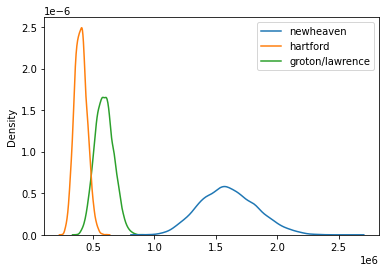

In [ ]:
# Plot
sns.kdeplot(data=cost2)

In [ ]:
# Present the total shipping cost with five number summaries
pd.DataFrame(totalcost2).describe().round(3)

,0
count,10000.000
mean,2597332.141
std,344954.310
min,1537956.840
25%,2348435.305
50%,2586238.995
75%,2829629.602
max,4108961.300


In [ ]:
# Present the total supply with five number summaries
pd.DataFrame(totalsupply2).describe().round(3)

,0
count,10000.00
mean,52340.84
std,6613.10
min,32751.00
25%,47538.50
50%,52134.00
75%,56697.25
max,79791.00


# Section 3: Analysis 

## Plots for the Network Model Pt. 1

Plot  the probability distribution of shipping costs and the expected number of cases in your 10 cities  by the Network Model Pt. 1

[Text(0.5, 0, 'CDF: the expected number of cases in your 10 cities')]

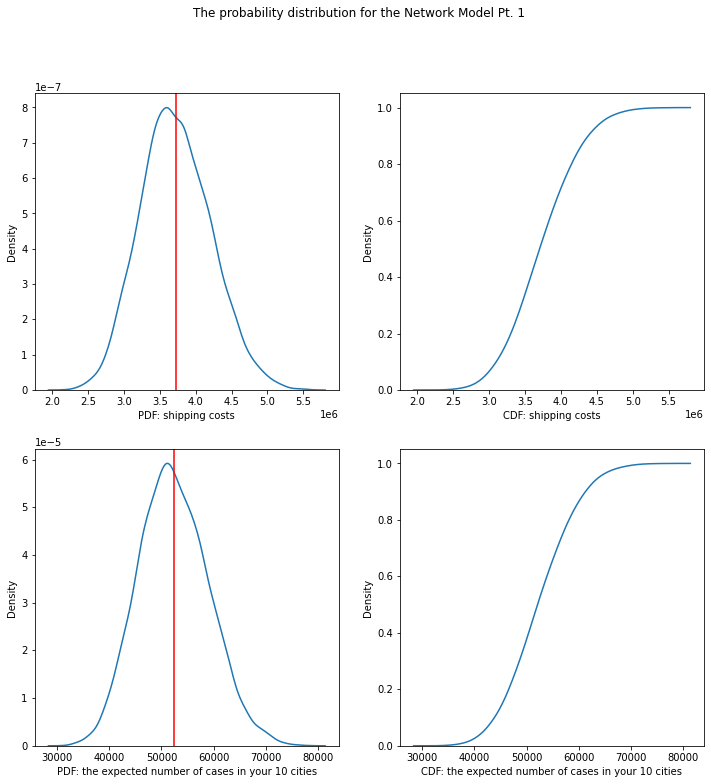

In [ ]:
# import modules
import numpy as np
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting
from pylab import * # for plotting

fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(12,12))
fig.suptitle('The probability distribution for the Network Model Pt. 1')
sns.kdeplot(totalcost ,ax=axs[0,0])
axs[0,0].axvline(np.mean(totalcost), color='red')
axs[0,0].set(xlabel='PDF: shipping costs')

sns.kdeplot(totalsupply,ax=axs[1,0])
axs[1,0].axvline(np.mean(totalsupply), color='red')
axs[1,0].set(xlabel='PDF: the expected number of cases in your 10 cities')

sns.kdeplot(totalcost,cumulative=True,ax=axs[0,1])
axs[0,1].set(xlabel='CDF: shipping costs')

sns.kdeplot(totalsupply,cumulative=True,ax=axs[1,1])
axs[1,1].set(xlabel='CDF: the expected number of cases in your 10 cities')

## Plots for the Network Model Pt. 2

Plot  the probability distribution of shipping costs and the expected number of cases in your 10 cities  by the Network Model Pt. 2

[Text(0.5, 0, 'CDF: the expected number of cases in your 10 cities')]

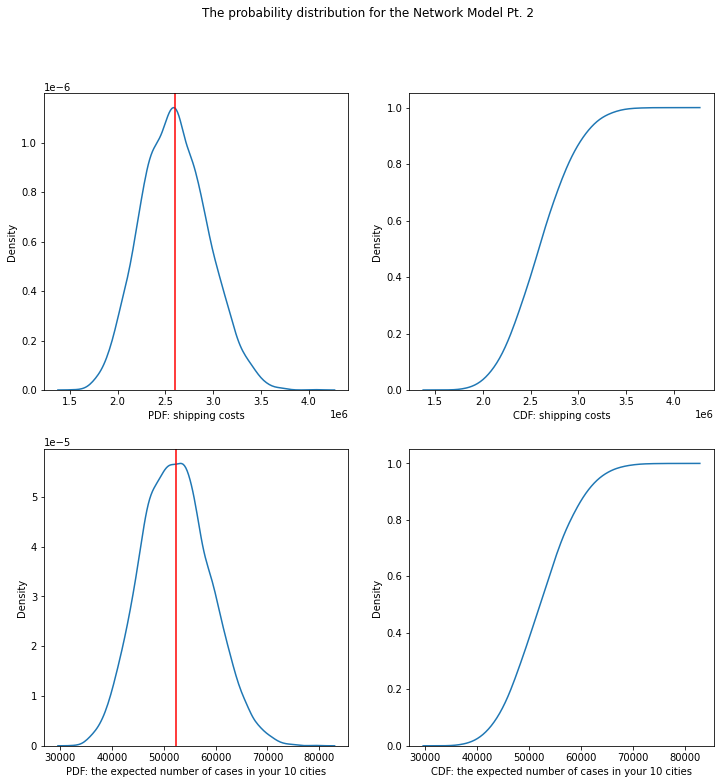

In [ ]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(12,12))
fig.suptitle('The probability distribution for the Network Model Pt. 2')
sns.kdeplot(totalcost2 ,ax=axs[0,0])
axs[0,0].axvline(np.mean(totalcost2), color='red')
axs[0,0].set(xlabel='PDF: shipping costs')

sns.kdeplot(totalsupply2,ax=axs[1,0])
axs[1,0].axvline(np.mean(totalsupply2), color='red')
axs[1,0].set(xlabel='PDF: the expected number of cases in your 10 cities')

sns.kdeplot(totalcost2,cumulative=True,ax=axs[0,1])
axs[0,1].set(xlabel='CDF: shipping costs')

sns.kdeplot(totalsupply2,cumulative=True,ax=axs[1,1])
axs[1,1].set(xlabel='CDF: the expected number of cases in your 10 cities')

# Conclusion




 
**Our analysis from the Baseline Model** - 

Given a fixed demand for each of the 10 cities the total shipping cost for YaleNewHaven is 281144, for Hartford is 478667, and for GrotonLawrence 637674.

**For Monte-Carlo Simulation Part 1** - 

The minimum amount (quantity) that the government must allocate for each hospital:
- NewHaven - 12604 (minimum cost 380129)
- Hartford - 9453 (minimum cost 744253)
- GrotonLawrence - 9453 (minimum cost 1005509)

And the maximum (quantity) that the government must allocate is:

- NewHaven - 31285 (max cost 1255899)
- Hartford - 23464 (max cost 1938086)
- GrotonLawrence - 23464 (max cost 2565281)

Note: We calculated the maximum by taking 5 times of the minimum baseline demand.

**For Monte-Carlo Simulation Part 2** - 

The minimum amount (quantity) that the government must allocate for each hospital:
- NewHaven - 26199 (minimum cost 916827)
- Hartford - 3276 (minimum cost 251400)
- GrotonLawrence - 3276 (minimum cost 369729)

And the maximum (quantity) that the government must allocate is:

- NewHaven - 63831 (max cost 2595953)
- Hartford - 7980 (max cost 612385)
- GrotonLawrence - 7980 (max cost 900622)

Note: We calculated the maximum by taking 5 times of the minimum baseline demand.

************************************************
***How much should government allocate for shipping cost?***

- With the constraints that were provided to us, we can recommend the following:

  - When the assumption is that each hospital must provide atleast 30% of the vaccines:
      - the minimum amount that the government must allocate is 2129891 and the maximum cost that must be allocated is 5759266.

  - When the assumption is that each hospital must provide atleast 10% of the vaccines:
      - the minimum amount that the government must allocate is 1537956 and the maximum cost that must be allocated is 4108960.

***Is there one particular hospital that seems to be a “best fit” for the county you have been assigned to?***

Yes, NewHaven Hospital seems to be a 'best fit' according to our model for the Fairfield county because most number of vaccines are being shipped from NewHaven at an optimized cost.

NewHaven should ship vaccines to four cities - Bridgeport, Fairfield, Stamford, and Trumbull.

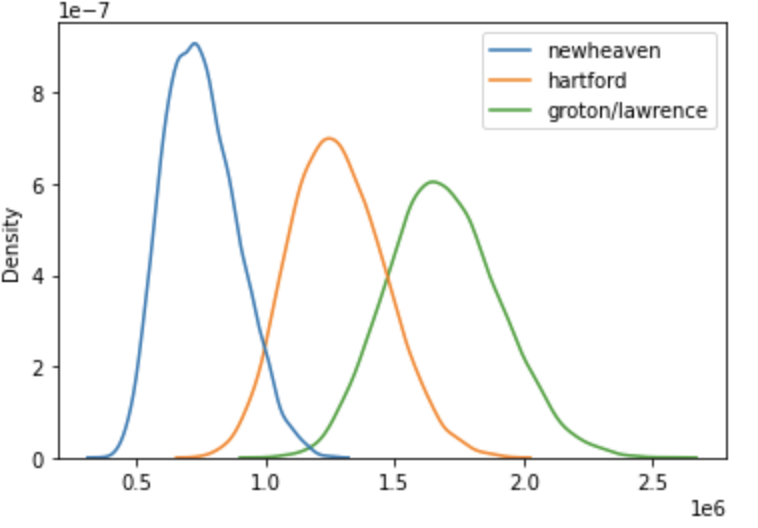

***Which hospital(s) seems to be more interesting between Models 1 and 2?***

We found GrotonLawrence and Hartford to be the most interesting of the 3 Hospitals.

The reason being - the quantities being shipped from both these hospitals ( model 1 and model 2) is same, however, the cost associated with shipping these vaccines is less for Hartford by a good margin compared to GrotonLawrence.

We found this part of our analysis to be quite interesting.

***How much can be saved if we replace the original assumptions for this new one (for example, what dollar amount should the government have available to be 90% sure they can cover shipping expenses?)***

The total shipping cost for our original (baseline) model was:

YaleNewHaven - 281144,

Hartford - 478667,

GrotonLawrence 637674

**Total shipping cost = 1397485**

On comparing Monte Carlo model 1 to model 2, we found the ***total mean*** of supply of the hospitals for **model 1 is: 3726068** and that of the **model 2 is: 2597332.**

We can conclude that model 2 gave us a more optimized solution thereby providing us with a **saving of 1128736.**

Considering the situation where **cases increases 5-fold**, the government in that case should allocate a **maximum amount of 4108961.**

For the government to be 90% sure that they can cover the shipping expenses, they **should allocate 90& of the maximum amount of 4108961**, ***which comes out to be 3698065.***

According to our analysis, we would recommend to go ahead with Monte Carlo Model 2 as it would help in **saving an amount of 1128736.**

We can further analyze the Monte Carlo simulation on per city basis as per the changes in demand.

# Group Member Contribution

* Lauren- Worked on background information for introduction, choosing 10 cities, map of connecticut with cities and hospitals, and video presentation of section 1.

* Jiajun- Worked on Modeling and analysis sections

* Junchi Ma- Worked on calculate the distance and network plot.

* Vedant - Background information, assisted in modeling, conclusion, and video presentation